In [1]:
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib 
%matplotlib inline
import matplotlib.animation as animation
from matplotlib import gridspec

In [2]:
# steps: the reward function for the problem
# agent gets a reward at step #9, and is penalised at step #0.
# there is no direct reward for the intermediate steps!
def steps(x):
    if x == 9: return 1
    if x == 0: return -1
    return 0

In [9]:
nstates = 10 # number of states (steps)
actions = [-1, 1]
nactions = 2 # move left or right
lr = 0.1 # learning rate
gamma = 0.9 # greedy(=0) vs. future-looking(=1)

# Initialise the Q-table randomly.
# Since there will be no way to update the Q-value of 
# the terminal-states when running, set them to zero now.
Q = np.random.rand(nstates, nactions)
Q[9, :] = 0
Q[0, :] = 0
print Q

savedQ = []

[[ 0.          0.        ]
 [ 0.64427846  0.67252048]
 [ 0.60181593  0.6494866 ]
 [ 0.81371179  0.78588133]
 [ 0.6308935   0.8794113 ]
 [ 0.79561412  0.56332043]
 [ 0.48970866  0.7973043 ]
 [ 0.64924302  0.62580085]
 [ 0.12732959  0.51284937]
 [ 0.          0.        ]]


In [10]:
# Next we generate a bunch of episodes, which are simply sampled randomly
savedQ = [] # stores history of the Q-table
for episode in range(500):
    state = np.random.choice( range(1, 9) )#2. # inital step
    nmoves = 0
    savedQ.append( np.round(Q, 2) )

    for i in range(12): # max_moves = 12
        nmoves += 1
        # pick a random action (0=move left, 1=move right)
        a = np.random.choice( [0, 1] )
        newstate = state + actions[a]
        
        # first get the immediate reward from 'a'
        reward = steps(newstate) - steps(state)
        # update Q
        # max_nextstep i.e. max_a'(Q[s', a'])
        # find what we think is the best action in newstate
        max_nextstep = np.max(Q[newstate, :])
        update = reward + gamma * max_nextstep - Q[state, a]
        Q[state, a] = Q[state, a] + lr * update

        state = newstate
        if state == 0:
            # game over
            break

        if state == 9:
            # we won (end of game)
            break

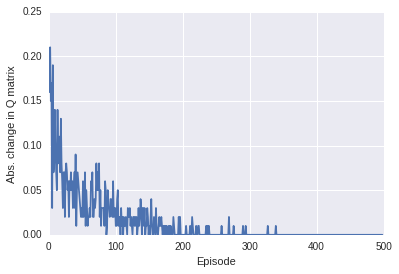

In [11]:
savedQ = np.array(savedQ)
deltaQ = np.diff(savedQ, axis=0) # 0 as diff Q between episodes
deltaQ = np.abs(deltaQ) # just absolute change between episodes
deltaQ = np.sum(deltaQ, axis=1)
deltaQ = np.sum(deltaQ, axis=1) # was axis 2, but becomes axis 1

sns.plt.plot(np.arange(deltaQ.shape[0]), deltaQ)
sns.plt.xlabel('Episode')
sns.plt.ylabel('Abs. change in Q matrix')
sns.plt.savefig('deltaQ.png')

In [12]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)



from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [14]:
import matplotlib.pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)